# rossmann-toolbox tutorial
---
In the case of problems do not hesitate to [contact us!](https://lbs.cent.uw.edu.pl)


In [1]:
from rossmann_toolbox import RossmannToolbox
import matplotlib.pylab as plt

# Structure-based predictions require FoldX, an external tool that can be obtained at:
# http://foldxsuite.crg.eu/academic-license-info
# Note that the foldX license expires periodically and has to be renewed by re-downloading the package.
PATH_FOLDX = '/home/users/sdunin/apps/foldx5/foldx'

# The b-a-b core regions can be either provided as an input or detected with the rossmann-toolbox. 
# The predictions can be made either with an deep learning tool included in the package or with 
# the HHpred tool. In the latter case, the HHpred path has to be provided.
PATH_HHPRED = '/opt/apps/hh-suite/bin/hhsearch'


Using backend: pytorch


In [2]:
rtb = RossmannToolbox(use_gpu=True, path_foldx_bin = PATH_FOLDX, 
                                    hhsearch_loc = PATH_HHPRED)

Loaded 4 structure-based prediction models.


## Sequence-based predictions

#### The b-a-b core sequence is provided by the user `mode='core'`

In [4]:
# Example obtained from Bae et al., 2010

data = {'seq1': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGR', # WT, binds NAD
        'seq2': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'} # D211S, I212R mutant, binds NADP

preds, imps = rtb.predict(data, mode='core', importance=True)
preds

{'seq1': {'FAD': 0.0005603419,
  'FAD_std': 0.0011000456,
  'NAD': 0.99922574,
  'NAD_std': 0.0015423914,
  'NADP': 3.5335976e-05,
  'NADP_std': 5.579921e-05,
  'SAM': 0.00019388269,
  'SAM_std': 0.00037741943},
 'seq2': {'FAD': 1.864489e-05,
  'FAD_std': 3.1416417e-05,
  'NAD': 0.020830967,
  'NAD_std': 0.03749063,
  'NADP': 0.9933503,
  'NADP_std': 0.011801811,
  'SAM': 3.6996444e-05,
  'SAM_std': 5.2185434e-05}}

<ErrorbarContainer object of 3 artists>

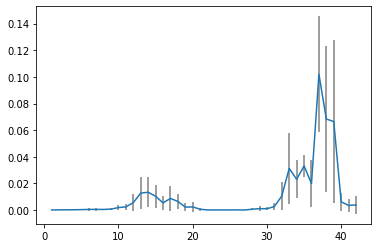

In [5]:
# Which residues made the greatest contribution in predicting the WT as NAD-binding?
seq_len = len(data['seq1'])
plt.errorbar(list(range(1, seq_len+1)),
             imps['seq1']['NAD'][0], yerr=imps['seq1']['NAD'][1], ecolor='grey')


#### The b-a-b core will be predicted in the full-length sequence `mode='seq'`

In [6]:
data = {'3m6i_A': 'MASSASKTNIGVFTNPQHDLWISEASPSLESVQKGEELKEGEVTVAVRSTGICGSDVHFWKHGCIGPMIVECDHVLGHESAGEVIAVHPSVKSIKVGDRVAIEPQVICNACEPCLTGRYNGCERVDFLSTPPVPGLLRRYVNHPAVWCHKIGNMSYENGAMLEPLSVALAGLQRAGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRLKFAKEICPEVVTHKVERLSAEESAKKIVESFGGIEPAVALECTGVESSIAAAIWAVKFGGKVFVIGVGKNEIQIPFMRASVREVDLQFQYRYCNTWPRAIRLVENGLVDLTRLVTHRFPLEDALKAFETASDPKTGAIKVQIQSLE'}

# Core region detection with in-built deep-learning model
preds = rtb.predict(data, mode='seq', core_detect_mode='dl', importance=False)
preds




{'3m6i_A': {'FAD': 0.00089554524,
  'FAD_std': 0.0017580233,
  'NAD': 0.998446,
  'NAD_std': 0.0030978944,
  'NADP': 0.00015508466,
  'NADP_std': 0.0002893226,
  'SAM': 0.00025443878,
  'SAM_std': 0.0004918838,
  'sequence': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL'}}

In [7]:
# Core region detection with HHsearch tool of the HHpred package 
# Note that the two approaches may yield different results
preds = rtb.predict(data, mode='seq', core_detect_mode='hhsearch', importance=False)
preds

{'3m6i_A': {'FAD': 0.0010708282,
  'FAD_std': 0.0016058238,
  'NAD': 0.99925435,
  'NAD_std': 0.0013703959,
  'NADP': 0.0001793907,
  'NADP_std': 0.00020505665,
  'SAM': 0.00024647813,
  'SAM_std': 0.00047857445,
  'sequence': 'VLICGAGPIGLITMLCAKAAGACPLVITDIDE'}}

## Structure-based predictions

In [8]:
# We don't want to see PDB parsing warnings
import warnings; warnings.filterwarnings("ignore")

#### The b-a-b core will be predicted in the input structure `mode='seq'`

In [9]:
# Here, the input structure and all intermediate files will be stored
# Please follow naming format XXXX_Y.pdb where XXXX is protein id and Y is a chain
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/seq_mode'

# Define chains that will be evaluated. If the structure is not present in the directory it will be downloaded
chains_to_use = ['3m6i_A']

# The WT structure was predicted (as in the case of sequence-based mode) to bind NAD
preds = rtb.predict_structure(path_to_structures, chains_to_use, mode='seq', core_detect_mode='dl')
preds

[{'NAD': 0.9997788071632385,
  'NADP': 0.0018194946460425854,
  'SAM': 0.0034198295325040817,
  'FAD': 3.619955532485619e-05,
  'cofactor': 'NAD',
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL',
  'NAD_std': 0.00038787940866313875,
  'NADP_std': 0.002135709160938859,
  'SAM_std': 0.0041174632497131824,
  'FAD_std': 3.949692836613394e-05}]

#### The b-a-b core is provided by the user `mode='core'`

In [3]:
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/core_mode'

# The 3m6i_A.pdb file contains a model obtained with Modeller in which the two mutations D211S, I212R
# were introduced. Not that this is a model of the whole structure not just the core region. 
# The full structure has to be used, as the structural features are contextual (e.g. burial of a residue
# can be correctly assessed only in the context of the whole structure)
chains_to_use = ['3m6i_A']


In [4]:
# The mutated structure was predicted (as in the case of sequence-based mode) to bind NADP
preds = rtb.predict_structure(path_to_structures, chains_to_use, mode='core', 
                              core_list=['AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'])
preds

/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'N' for Atom (name=N) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'C' for Atom (name=CA) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'C' for Atom (name=C) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'O' for Atom (name=O) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'C' for Atom (name=CB) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'O' for Atom (name=OG) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Atom.py:218 - Used element 'C' for Atom (name=CG) with given element ''
/home/users/sdunin/.local/lib/python3.6/site-packages/Bio/PDB/Ato

[{'NAD': 0.07392216473817825,
  'NADP': 0.9937467575073242,
  'SAM': 0.003925769589841366,
  'FAD': 0.00022765068570151925,
  'cofactor': 'NADP',
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR',
  'NAD_std': 0.1220666915178299,
  'NADP_std': 0.0077379010617733,
  'SAM_std': 0.0040618558414280415,
  'FAD_std': 0.0002890863688662648}]